# Занятие 5
# Прикладная алгебра и численные методы
## Интерполяция: оценка близости функций

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy.linalg
import sympy
import bezier
from sympy import S, interpolating_spline, latex
from sympy.polys.specialpolys import interpolating_poly
from scipy.interpolate import lagrange, interp1d, splrep, splev, InterpolatedUnivariateSpline, BPoly, CubicSpline
from scipy.linalg import norm
from google.colab import files
from IPython.display import Math, Latex

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving rosstat_income.xlsx to rosstat_income (2).xlsx
User uploaded file "rosstat_income.xlsx" with length 20758 bytes


In [ ]:
!python -m pip install sympy --upgrade
!python -m pip install -U matplotlib
!pip install numpy

https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.norm.html#scipy.linalg.norm

https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html


## Многочлен Лагранжа
$$
f(x) = L(x) = \sum_{i=1}^n y_i 
\frac{(x - x_0)(x - x_1)...(x - x_{i-1})(x - x_{i+1})...(x - x_n)}{(x_i - x_0)(x_i - x_1)...(x_i - x_{i-1})(x_i - x_{i+1})...(x_i - x_n)}, 
\quad y_i = f(x_i), \quad i = 0, ..., n.
$$
## Задание 1
Построим полином Лагранжа для данных 

https://rosstat.gov.ru/folder/13397

файл rosstat_income.xlsx

Из файла считать данные о доходах в месяц в каждом квартале 2018 и 2019 гг. (среднее значение за год не учитывается). 

Построить полином Лагранжа в помощью 
scipy.interpolate.

Построить график полученного полинома, отметить соответствующие данные точками.

In [ ]:
rexcel = pd.read_excel(fn, index_col=0, skiprows=[0, 1, 2, 3, 10, 16, 22, 28, 34, 40, 46])
print(f"""index: {rexcel[:10].index},\ncolumns: {rexcel[:10].columns},\nvalues: {rexcel[:3].values},\naxes: {rexcel[:10].axes},
ndim: {rexcel.ndim}, size: {rexcel.size}, shape: {rexcel.shape}, empty: {rexcel.empty}""")

index: Index(['1 квартал', '2 квартал', '3 квартал', '4 квартал', 'Год', '1 квартал',
       '2 квартал', '3 квартал', '4 квартал', 'Год'],
      dtype='object', name='2013 год'),
columns: Index(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'], dtype='object'),
values: [[21800.0 'х' 'х']
 [24990.0 'х' 114.6]
 [25529.0 'х' 102.2]],
axes: [Index(['1 квартал', '2 квартал', '3 квартал', '4 квартал', 'Год', '1 квартал',
       '2 квартал', '3 квартал', '4 квартал', 'Год'],
      dtype='object', name='2013 год'), Index(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'], dtype='object')],
ndim: 2, size: 129, shape: (43, 3), empty: False


array([28937.0, 32371.0, 32512.0, 38848.0, 30164.0, 34484.0, 34997.0,
       41328.0], dtype=object)

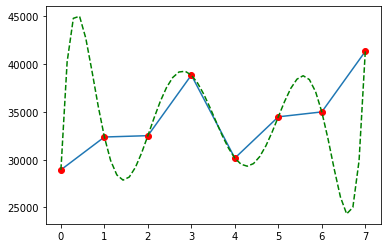

In [ ]:
Y1 = np.hstack((rexcel.values[25:29, 0], rexcel.values[30:34, 0]))

display(Y1)
X1 = np.array(range(len(Y1)))
plt.plot(X1,Y1)
poly1 = lagrange(X1, Y1)
X1ls = np.linspace(X1[0], X1[-1])
plt.plot(X1, Y1, 'ro', X1ls, poly1(X1ls), 'g--')

## Задание 2.
Построить полином Лагранжа для данных из файла задания 1,
использовать средние значения каждого года с 2013 по 2020.

Построить график полученного полинома Лагранжа, отметить на нем все точки данных в каждом квартале. 

Вычислить и вывести на экран нормы разности вектора поквартальных доходов и вектора соответствующих значений полинома Лагранжа, реализованные для векторов в scipy.linalg.

array([25684.0, 27412.0, 30254.0, 30865.0, 31897.0, 33178.0, 35247.0,
       35361.0], dtype=object)

[0, 1, 2, 3, 4, 5, 6, 7]

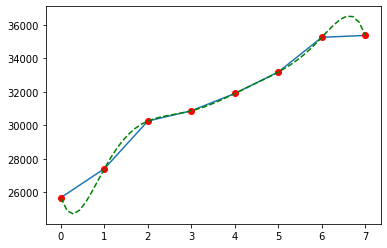

In [ ]:
Y2 = rexcel.values[list(range(4, 40, 5)),0]
display(Y2)
X2 = list(range(len(Y2)))
display(X2)
plt.plot(X2,Y2)
poly2 = lagrange(X2, Y2)
X2ls = np.linspace(X2[0], X2[-1])
plt.plot(X2, Y2, 'ro', X2ls, poly2(X2ls), 'g--')

## Задание 3
Аппроксимировать $f(x) = \ln(x + 1)$ на отрезке $[0, 2]$ квадратичным сплайном с узлами с шагом 0.5.

Вычислить значения функции и сплайна в узлах равномерной сетки  от 0.1 до 2.0 с шагом 0.2, найти нормы разности полученных векторов (округлить то 4 знаков).

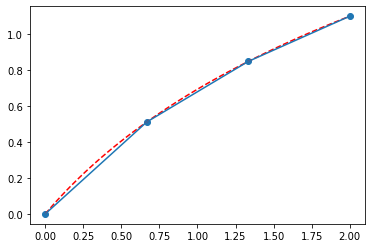

In [ ]:
Xln = np.linspace(0, 2, 4)
Yln = np.log(Xln + 1)

spl = interp1d(Xln, Yln, kind='quadratic')

X = np.linspace(0,2)
Y = np.log(X + 1)
plt.plot(X,Y, 'r--')
plt.plot(Xln, spl(Xln))
plt.scatter(Xln, Yln)


## Задание 4
Аппроксимировать $f(x) = \ln(x + 1)$ на отрезке $[0, 2]$ кубическим сплайном с узлами с шагом 0.5.

Вычислить значения функции и сплайна в узлах равномерной сетки  от 0.1 до 2.0 с шагом 0.2, найти нормы разности полученных векторов (округлить то 4 знаков).

Вычислить с помощью sympy интеграл квадрата разности $f(x)$ и сплайна (построить средствами sympy) на отрезке $[0, 2]$.

## Кривые Безье

https://bezier.readthedocs.io/en/stable/python/reference/bezier.curve.html

## Задание 5
Построить кривую Безье с помощью модуля bezier:

https://bezier.readthedocs.io/en/stable/python/reference/bezier.curve.html

Кривая должна аппроксимировать $f(x) = x\ln(x)$, проходя через точки 1 и 4, при этом в этих точках касательная кривой Безье должна совпадать с касательной $f(x)$.

Построить на общем графике $f(x)$ и кривую Безье, отметить узловые точки.

Вычислить значения функции и вертикальной координаты точки на кривой Безье в узлах равномерной сетки отрезка [1.000001, 4.0] с шагом 0.1. 

Вычислить все нормы разности полученных векторов.

Вычислить с помощью sympy интеграл квадрата разности $f(x)$ и кривой Безье на отрезке $[1, 4]$. Использовать implicitize и solve.

In [ ]:
!pip install bezier --user

In [ ]:
import bezier